<a href="https://colab.research.google.com/github/CarlosARossi/dataScienceCoder/blob/main/Post_PrimeraEntrega%2BRossi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primera Entrega


### Objetivos generales

1. Estructurar un problema en función de múltiples, pero simples preguntas/hipótesis a responder.
2. Analizar datos tabulares (e.g excel, csv, etc)  usando Python.
3. Utilizar modelos de Machine Learning con Python.







## 1. Estructura del problema

### 1.1. Definición de objetivo

El objetivo del proyecto es proporcionar información sobre las bandas salariales en función de los datos personales de los individuos y ofrecer recomendaciones tanto para profesionales en búsqueda de empleo como para el personal de recursos humanos.

### 1.2. Contexto comercial

La determinación de la banda salarial adecuada es crucial para profesionales y organizaciones que desean establecer compensaciones justas y competitivas en el mercado laboral.

### 1.3. Problema Comercial

 La falta de información clara y precisa sobre las bandas salariales en función de los atributos personales dificulta la toma de decisiones tanto para profesionales en búsqueda de empleo como para el personal de recursos humanos.

### 1.4. Contexto analítico

El análisis de datos se utilizará para identificar patrones y relaciones entre variables relevantes, como la edad, los estudios, el país, entre otros, y los niveles salariales.

### 1.5. Exploración de datos (EDA)

Al realizar un análisis inicial del conjunto de datos original [Salary_Data_2022_REV15_2](https://www.kaggle.com/datasets/ricardoaugas/salary-transparency-dataset-2022), se observa que los datos provienen de diversas fuentes y países, cada uno con su propia moneda y forma de expresar el salario. Por lo tanto, será necesario agregar información adicional al conjunto de datos para estandarizar la moneda y el período salarial en una única forma de representación.

Se realizó una exploración de datos (EDA) sobre el conjunto de datos original. Los principales pasos realizados fueron:

1. Se agregó la columna **Exchange.rate.to.USD** para estandarizar los salarios en una misma moneda (USD). Se buscó la tasa de conversión a USD para las diferentes monedas del dataset y se asignaron los valores correspondientes.

2. Se creó la columna **SalaryUSD** dividiendo los salarios en la columna **Salary** por las tasas de conversión. Esto permitió tener todos los salarios expresados en USD.

3. Se agregó la columna **Salary.Period** para identificar el período de los salarios. Se identificaron los países que utilizaban un período anual y se creó un array con ellos. Los países no incluidos en el array se consideraron salarios mensuales.

4. Se creó la columna **Monthly.SalaryUSD** dividiendo los salarios anuales en la columna **SalaryUSD** por 12. Los salarios mensuales se copiaron directamente a esta columna.

5. Se realizó una limpieza de salarios con valor cero en la columna **Monthly.SalaryUSD** para mejorar la precisión en el cálculo del promedio. Las filas con salarios igual a cero se eliminaron del dataset.

Estos pasos de EDA permitieron estandarizar los salarios en USD y eliminar datos inconsistentes. Esto facilitó un análisis más preciso y robusto de los datos relacionados con los salarios en el dataset.

## 2. Análisis de Datos

### 2.1. Importación de librerias y datasets

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
import matplotlib.ticker as ticker

Importo el dataset generado en el notebook [ProyectoDS_ParteII_+Rossi.ipynb](https://github.com/CarlosARossi/dataScienceCoder/blob/main/ProyectoDS_ParteII_%2BRossi.ipynb), en el cual se aplicó una exploración de datos (EDA).

In [2]:
url = 'https://raw.githubusercontent.com/CarlosARossi/dataScienceCoder/main/Datasets/Salary_Data_2022_REV15_USD_Months.csv'
salaries = pd.read_csv(url)
salaries

,ID,Timestamp,Age.Range,Years.of.Experience,Industry,Job.Title,Company.Name,Education,Location,Country,...,Open.To.Discuss.Salary,How.many.months.Maternity.or.Paternity.does.your.company.offer.,Gender,X,Diverse.Identity..Optional.,Description,Exchange.rate.to.USD,SalaryUSD,Salary.Period,Monthly.SalaryUSD
0,1,12/8/2021 3:05,18-21,3.0,GAMING,STREAMER,TWITCH,None,LOS ANGELES CA,US,...,No,as much as i want,Male,NaN,NaN,TWITCH,1.00000,490000.000000,Annual,40833.333333
1,2,12/9/2021 15:49,30-33,5.0,HEALTHCARE,AESTHETIC NURSE PRACTITIONER/BUSINESS OWNER,AESTHETIC CLINIC,Master's Degree,WINNIPEG,CANADA,...,Yes,NaN,Male,NaN,NaN,AESTHETIC CLINIC,1.28848,380293.058488,Annual,31691.088207
2,3,12/8/2021 2:16,18-21,1.0,ONLINE ARCADE,OWNER,RUST CLASH,High School/GED,SAN DIEGO,US,...,Yes,NaN,Male,NaN,NaN,RUST CLASH,1.00000,480000.000000,Annual,40000.000000
3,4,12/8/2021 5:15,18-21,2.0,CRYPTO,HEAD OF MARKETING,REDACTED,Some College,"TAMPA, FL",US,...,Yes,Not sure,Male,NaN,NaN,REDACTED,1.00000,480000.000000,Annual,40000.000000
4,5,12/8/2021 14:16,34-37,13.0,WINDOW COVERINGS,OWNER,CAROLINA BLIND CRAFTERS,Bachelor's Degree,"CHARLOTTE, NC",US,...,No,None,Female,NaN,NaN,CAROLINA BLIND CRAFTERS,1.00000,480000.000000,Annual,40000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31757,31758,12/17/2021 1:49,30-33,5.0,ECOMMERCE,DESIGN MANAGER,MIS,Bachelor's Degree,MUMBAI,INDIA,...,No,NaN,Male,NaN,NaN,MIS,75.87400,0.092258,Monthly,0.092258
31758,31759,12/23/2021 4:12,22-25,5.0,HOTEL/RESTAURANT,MANAGER/CHEF,CASA BAROLO,Bachelor's Degree,"CLUJ-NAPOCA, CLUJ",ROMANIA,...,Yes,24,Female,NaN,NaN,CASA BAROLO,4.39980,1.363698,Monthly,1.363698
31759,31760,12/7/2021 19:40,58+,NaN,SPORTS,ANALYST,ESPN,None,SAN JOSE,US,...,No,0,Female,NaN,They,ESPN,1.00000,1.000000,Annual,0.083333
31760,32569,1/7/2022 12:40,26-29,4.0,MATERIAL HANDLING,SOLUTIONS CONSULTANT,DEMATIC,Bachelor's Degree,"GRAND RAPIDS, MI",US,...,Yes,NaN,Male,NaN,Hispanic,DEMATIC,1.00000,110000.000000,Annual,9166.666667


### 2.2. Análisis inicial

In [3]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31762 entries, 0 to 31761
Data columns (total 28 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   ID                                                               31762 non-null  int64  
 1   Timestamp                                                        31762 non-null  object 
 2   Age.Range                                                        31742 non-null  object 
 3   Years.of.Experience                                              31260 non-null  float64
 4   Industry                                                         31558 non-null  object 
 5   Job.Title                                                        31758 non-null  object 
 6   Company.Name                                                     31760 non-null  object 
 7   Education                               

Procedo a analizar del dataset la cantidad de instancias únicas de las caracteristicas consideradas como variables nominales:

In [4]:
# Contar la cantidad de instancias únicas de las caracteristicas considerads como variables nominales

print("Cantidad de Generos:", len(salaries['Gender'].unique()))
print("Cantidad de Paises:", len(salaries['Country'].unique()))
print("Cantidad de Rangos de edad:", len(salaries['Age.Range'].unique()))
print("Cantidad de Industrias:", len(salaries['Industry'].unique()))
print("Cantidad de Puestos de trabajo:", len(salaries['Job.Title'].unique()))


Cantidad de Generos: 3
Cantidad de Paises: 55
Cantidad de Rangos de edad: 12
Cantidad de Industrias: 5618
Cantidad de Puestos de trabajo: 12592


Debido a la alta cantidad de instancias únicas que tienen las variables nominales elegidas, principalmente **Industry** y **Job.Title**, puedo encontrarme con problemas de alta cardinalidad. Para poder evitar esto, procederé a aplicar una técnica de reducción manual basada en la Ley de Pareto.

### 2.3. Reducción de Instancias



In [5]:
# Crear una copia del dataset original
salaries_reduced = salaries.copy()

# Elimino las columnas que no me interesan
columns_to_keep = ['Age.Range', 'Years.of.Experience', 'Industry', 'Job.Title', 'Education', 'Country', 'Gender', 'Monthly.SalaryUSD']
salaries_reduced = salaries_reduced[columns_to_keep]
salaries_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31762 entries, 0 to 31761
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age.Range            31742 non-null  object 
 1   Years.of.Experience  31260 non-null  float64
 2   Industry             31558 non-null  object 
 3   Job.Title            31758 non-null  object 
 4   Education            31762 non-null  object 
 5   Country              31762 non-null  object 
 6   Gender               31762 non-null  object 
 7   Monthly.SalaryUSD    31762 non-null  float64
dtypes: float64(2), object(6)
memory usage: 1.9+ MB


#### 3.1. Rango de edades [Age.Range]

Verifico que no haya quedado ninguna instancia con NaN

In [6]:
# Contar la cantidad de NaN en la columna seleccionada
nan_count = salaries_reduced['Age.Range'].isna().sum()

# Imprimir el resultado
print("Cantidad de NaN en la columna '{}': {}".format('Age.Range', nan_count))

Cantidad de NaN en la columna 'Age.Range': 20


In [7]:
# Reemplazar los NaN por 'OTHERS'
salaries_reduced['Age.Range'].fillna('OTHERS', inplace=True)

# Verifico el resultado
nan_count = salaries_reduced['Age.Range'].isna().sum()
print("Cantidad de NaN en la columna '{}': {}".format('Age.Range', nan_count))

Cantidad de NaN en la columna 'Age.Range': 0


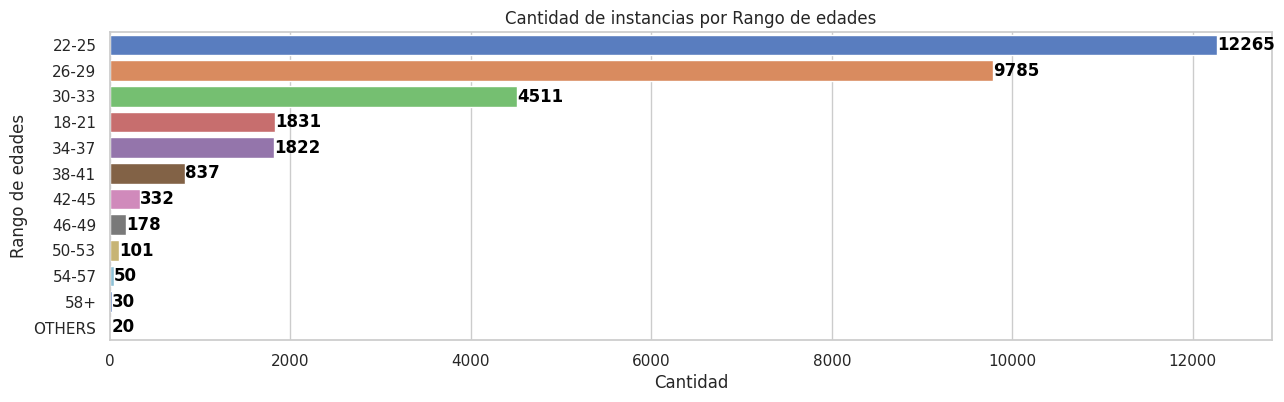

In [8]:
# Contar las instancias únicas de Age.Range
age_range_counts = salaries_reduced['Age.Range'].value_counts()

# Ordenar en orden descendente
age_range_counts = age_range_counts.sort_values(ascending=False)

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(15, 4))
ax = sns.barplot(x=age_range_counts.values, y=age_range_counts.index, palette="muted")

# Agregar el número de cuentas en cada barra
for i, count in enumerate(age_range_counts):
    ax.text(count, i, str(count), ha='left', va='center', color='black', weight='bold')

# Configurar los títulos y etiquetas de los ejes
plt.xlabel('Cantidad')
plt.ylabel('Rango de edades')
plt.title('Cantidad de instancias por Rango de edades')

plt.show()

#### 3.2. Años de experiencia [Years.of.Experience]

Verifico que no haya quedado ninguna instancia con NaN

In [9]:
# Contar la cantidad de NaN en la columna seleccionada
nan_count = salaries_reduced['Years.of.Experience'].isna().sum()

# Imprimir el resultado
print("Cantidad de NaN en la columna '{}': {}".format('Years.of.Experience', nan_count))

Cantidad de NaN en la columna 'Years.of.Experience': 502


In [10]:
# Reemplazar los NaN por el valor medio de 'Years.of.Experience'
# Calcular el valor medio de la columna 'A'
mean_value = salaries_reduced['Years.of.Experience'].mean()
salaries_reduced['Years.of.Experience'].fillna(mean_value, inplace=True)

# Verifico el resultado
nan_count = salaries_reduced['Years.of.Experience'].isna().sum()
print("Cantidad de NaN en la columna '{}': {}".format('Years.of.Experience', nan_count))

Cantidad de NaN en la columna 'Years.of.Experience': 0


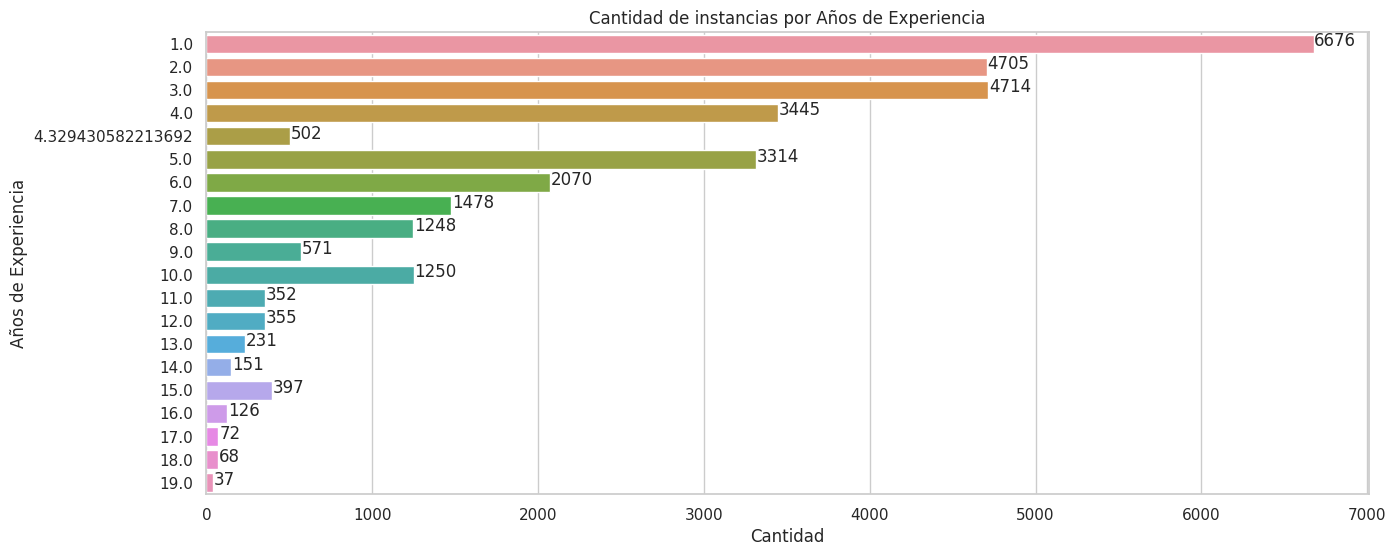

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
ax = sns.countplot(y='Years.of.Experience', data=salaries_reduced)

# Configurar los títulos y etiquetas de los ejes
plt.xlabel('Cantidad')
plt.ylabel('Años de Experiencia')
plt.title('Cantidad de instancias por Años de Experiencia')

# Agregar el número de cuentas en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width()+5, p.get_y()+0.5))


plt.show()


#### 3.3. Industrias [Industry]

In [12]:
# Calcular la frecuencia de las categorías en Industry
industry_counts = salaries_reduced['Industry'].value_counts()

In [13]:
# Calcular el porcentaje acumulado
industry_cumsum = industry_counts.cumsum() / industry_counts.sum()

In [14]:
# Calcular el umbral para agrupar las categorías menos frecuentes
threshold = industry_cumsum[industry_cumsum > 0.4].index[0]

# Agrupar las categorías menos frecuentes en 'others'
salaries_reduced.loc[salaries_reduced['Industry'].isin(industry_counts[industry_counts < industry_counts[threshold]].index), 'Industry'] = 'OTHERS'

# Verificar los resultados
print("Cantidad de Industrias:", len(salaries_reduced['Industry'].unique()))

Cantidad de Industrias: 19


Verifico que no haya quedado ninguna instancia con NaN

In [15]:
# Contar la cantidad de NaN en la columna seleccionada
nan_count = salaries_reduced['Industry'].isna().sum()

# Imprimir el resultado
print("Cantidad de NaN en la columna '{}': {}".format('Industry', nan_count))

Cantidad de NaN en la columna 'Industry': 204


In [16]:
# Reemplazar los NaN por 'OTHERS'
salaries_reduced['Industry'].fillna('OTHERS', inplace=True)

# Verifico el resultado
nan_count = salaries_reduced['Industry'].isna().sum()
print("Cantidad de NaN en la columna '{}': {}".format('Industry', nan_count))

Cantidad de NaN en la columna 'Industry': 0


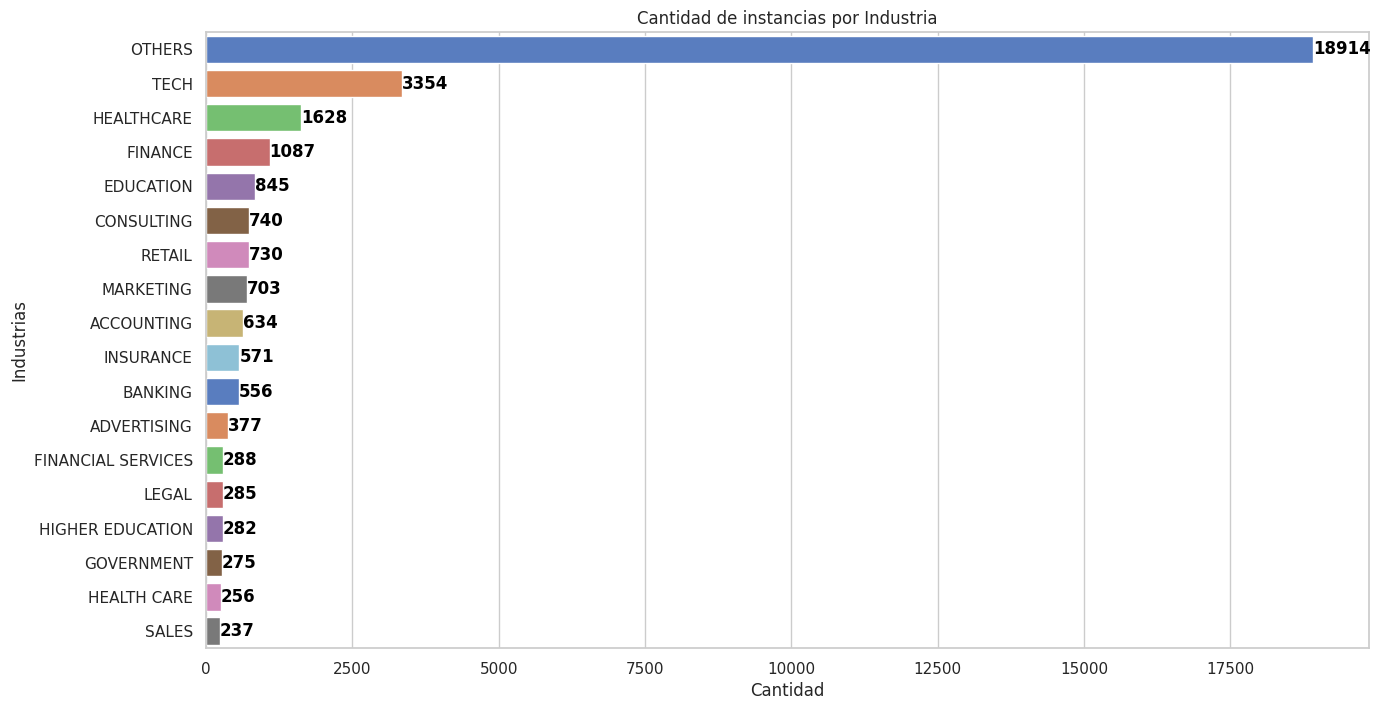

In [17]:
# Contar las instancias únicas de Industry
industry_counts = salaries_reduced['Industry'].value_counts()

# Ordenar en orden descendente
industry_counts = industry_counts.sort_values(ascending=False)

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=industry_counts.values, y=industry_counts.index, palette="muted")

# Agregar el número de cuentas en cada barra
for i, count in enumerate(industry_counts):
    ax.text(count, i, str(count), ha='left', va='center', color='black', weight='bold')

# Configurar los títulos y etiquetas de los ejes
plt.xlabel('Cantidad')
plt.ylabel('Industrias')
plt.title('Cantidad de instancias por Industria')

plt.show()

#### 3.4. Puestos de Trabajo [Job.Title]

In [18]:
# Calcular la frecuencia de las categorías en Job.Title
job_title_counts = salaries_reduced['Job.Title'].value_counts()


In [19]:
# Calcular el porcentaje acumulado
job_title_cumsum = job_title_counts.cumsum() / job_title_counts.sum()

In [20]:
# Calcular el umbral para agrupar las categorías menos frecuentes
threshold = job_title_cumsum[job_title_cumsum > 0.4].index[0]

# Agrupar las categorías menos frecuentes en 'others'
salaries_reduced.loc[salaries_reduced['Job.Title'].isin(job_title_counts[job_title_counts < job_title_counts[threshold]].index), 'Job.Title'] = 'OTHERS'

# Verificar los resultados
print("Cantidad de Puestos de trabajo:", len(salaries_reduced['Job.Title'].unique()))

Cantidad de Puestos de trabajo: 271


Verifico que no haya quedado ninguna instancia con NaN

In [21]:
# Contar la cantidad de NaN en la columna seleccionada
nan_count = salaries_reduced['Job.Title'].isna().sum()

# Imprimir el resultado
print("Cantidad de NaN en la columna '{}': {}".format('Job.Title', nan_count))

Cantidad de NaN en la columna 'Job.Title': 4


In [22]:
# Reemplazar los NaN por 'OTHERS'
salaries_reduced['Job.Title'].fillna('OTHERS', inplace=True)

# Verifico el resultado
nan_count = salaries_reduced['Job.Title'].isna().sum()
print("Cantidad de NaN en la columna '{}': {}".format('Job.Title', nan_count))

Cantidad de NaN en la columna 'Job.Title': 0


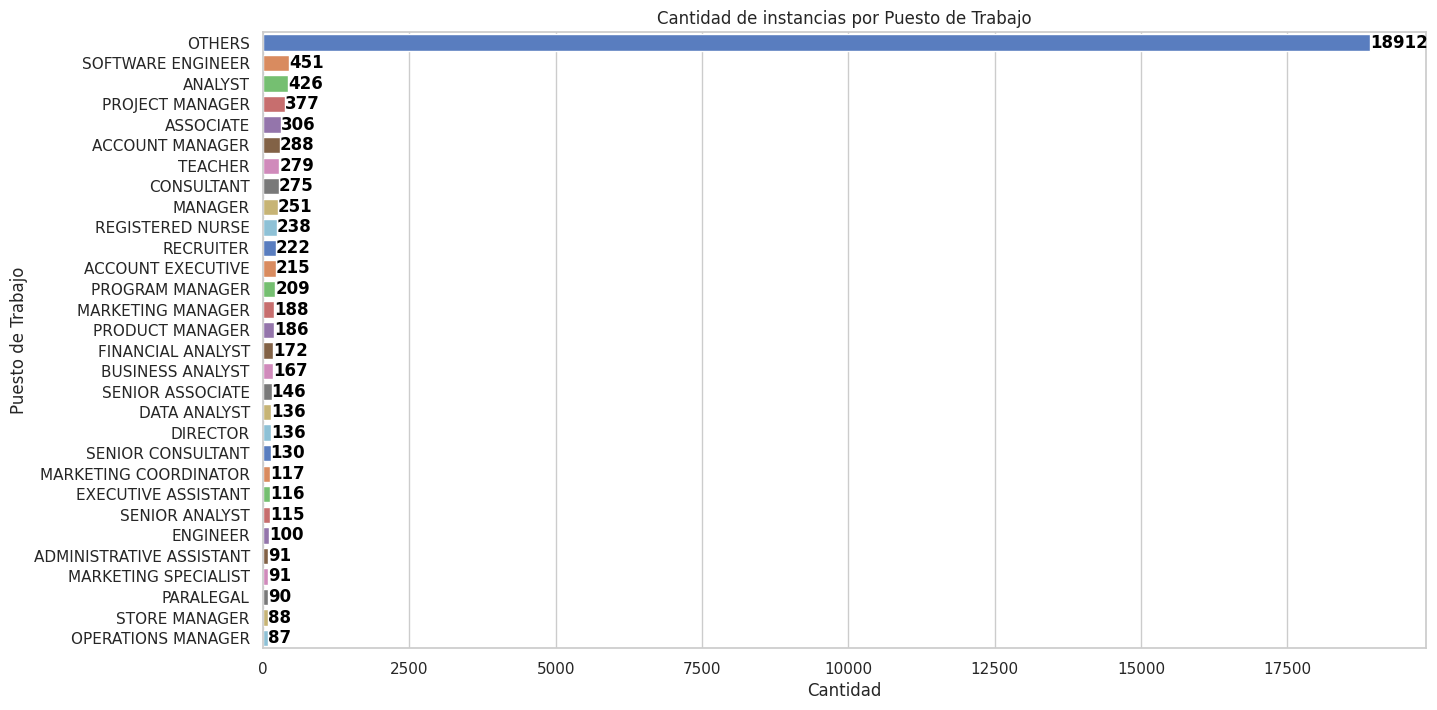

In [23]:
# Contar las instancias únicas de Job.Title
job_title_counts = salaries_reduced['Job.Title'].value_counts()

# Ordenar en orden descendente
job_title_counts = job_title_counts.sort_values(ascending=False).head(30)

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette="muted")

# Agregar el número de cuentas en cada barra
for i, count in enumerate(job_title_counts):
    ax.text(count, i, str(count), ha='left', va='center', color='black', weight='bold')

# Configurar los títulos y etiquetas de los ejes
plt.xlabel('Cantidad')
plt.ylabel('Puesto de Trabajo')
plt.title('Cantidad de instancias por Puesto de Trabajo')

plt.show()

#### 3.5. País [Country]

In [24]:
# Calcular la frecuencia de las categorías en Country
country_counts = salaries_reduced['Country'].value_counts()

In [25]:
# Calcular el porcentaje acumulado
country_cumsum = country_counts.cumsum() / country_counts.sum()

In [26]:
# Calcular el umbral para agrupar las categorías menos frecuentes
threshold = country_cumsum[country_cumsum > 0.995].index[0]

# Agrupar las categorías menos frecuentes en 'others'
salaries_reduced.loc[salaries_reduced['Country'].isin(country_counts[country_counts < country_counts[threshold]].index), 'Country'] = 'OTHERS'

# Verificar los resultados
print("Cantidad de Países:", len(salaries_reduced['Country'].unique()))

Cantidad de Países: 8


Verifico que no haya quedado ninguna instancia con NaN

In [27]:
# Contar la cantidad de NaN en la columna seleccionada
nan_count = salaries_reduced['Country'].isna().sum()

# Imprimir el resultado
print("Cantidad de NaN en la columna '{}': {}".format('Country', nan_count))

Cantidad de NaN en la columna 'Country': 0


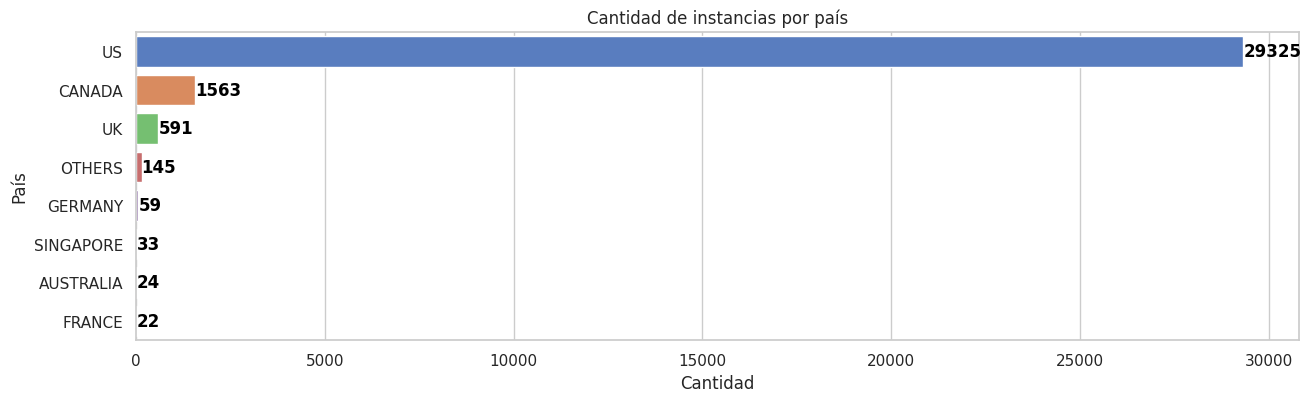

In [28]:
# Contar las instancias únicas de Country
country_counts = salaries_reduced['Country'].value_counts()

# Ordenar en orden descendente
country_counts = country_counts.sort_values(ascending=False)

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(15, 4))
ax = sns.barplot(x=country_counts.values, y=country_counts.index, palette="muted")

# Agregar el número de cuentas en cada barra
for i, count in enumerate(country_counts):
    ax.text(count, i, str(count), ha='left', va='center', color='black', weight='bold')

# Configurar los títulos y etiquetas de los ejes
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.title('Cantidad de instancias por país')

plt.show()

#### 3.5. Conclusión

In [29]:
# Contar la cantidad de instancias únicas de las caracteristicas considerads como variables nominales

print("Cantidad de Rango de Edades Antes:", len(salaries['Age.Range'].unique()))
print("Cantidad de Rango de Edades Ahora:", len(salaries_reduced['Age.Range'].unique()))
print("----------------------------------------")
print("Cantidad de Años de Experiencia Antes:", len(salaries['Years.of.Experience'].unique()))
print("Cantidad de Años de Experiencia Ahora:", len(salaries_reduced['Years.of.Experience'].unique()))
print("----------------------------------------")
print("Cantidad de Industrias Antes:", len(salaries['Industry'].unique()))
print("Cantidad de Industrias Ahora:", len(salaries_reduced['Industry'].unique()))
print("----------------------------------------")
print("Cantidad de Puestos de trabajo Antes:", len(salaries['Job.Title'].unique()))
print("Cantidad de Puestos de trabajo Ahora:", len(salaries_reduced['Job.Title'].unique()))
print("----------------------------------------")
print("Cantidad de Paises Antes:", len(salaries['Country'].unique()))
print("Cantidad de Paises Ahora:", len(salaries_reduced['Country'].unique()))
print("----------------------------------------")
print("Cantidad de Generos Antes:", len(salaries['Gender'].unique()))
print("Cantidad de Generos Ahora:", len(salaries_reduced['Gender'].unique()))

Cantidad de Rango de Edades Antes: 12
Cantidad de Rango de Edades Ahora: 12
----------------------------------------
Cantidad de Años de Experiencia Antes: 20
Cantidad de Años de Experiencia Ahora: 20
----------------------------------------
Cantidad de Industrias Antes: 5618
Cantidad de Industrias Ahora: 18
----------------------------------------
Cantidad de Puestos de trabajo Antes: 12592
Cantidad de Puestos de trabajo Ahora: 270
----------------------------------------
Cantidad de Paises Antes: 55
Cantidad de Paises Ahora: 8
----------------------------------------
Cantidad de Generos Antes: 3
Cantidad de Generos Ahora: 3


### 2.4. Feature Engineering


#### 4.1. One-Hot Encoding

Se aplicará One-Hot Encoding a las siguientes características:

* Country
* Age.Range
* Industry
* Job.Title
* Gender

Las cuales fueron elegidas debido a su naturaleza nominal y la cantidad moderada de instancias únicas en cada una de ellas. Esta técnica convierte las variables categóricas en columnas separadas con valores binarios.

In [30]:
nominal_variables = ['Country', 'Age.Range', 'Industry', 'Job.Title', 'Gender']

# Aplicar One-Hot Encoding
salaries_one_hot = pd.get_dummies(salaries_reduced, columns=nominal_variables)

# Verificar los resultados
salaries_one_hot

,Years.of.Experience,Education,Monthly.SalaryUSD,Country_AUSTRALIA,Country_CANADA,Country_FRANCE,Country_GERMANY,Country_OTHERS,Country_SINGAPORE,Country_UK,...,Job.Title_TERRITORY MANAGER,Job.Title_THERAPIST,Job.Title_TREASURY ANALYST,Job.Title_UNDERWRITER,Job.Title_UX DESIGNER,Job.Title_VICE PRESIDENT,Job.Title_VP,Gender_Female,Gender_LGBTQ+,Gender_Male
0,3.000000,None,40833.333333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.000000,Master's Degree,31691.088207,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.000000,High School/GED,40000.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2.000000,Some College,40000.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,13.000000,Bachelor's Degree,40000.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31757,5.000000,Bachelor's Degree,0.092258,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
31758,5.000000,Bachelor's Degree,1.363698,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
31759,4.329431,None,0.083333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31760,4.000000,Bachelor's Degree,9166.666667,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### 4.2. Ordinal Encoding

Se aplicará Ordinal Encoding a la siguiente caracteristica:

* Education  

Se eligió este método porque la variable Education tiene un orden implícito, como por ejemplo "High School" < "Bachelor's Degree" < "Master's Degree", y el Ordinal Encoding captura esta jerarquía de manera adecuada.

In [31]:
# Analiso cuales son las instancias unicas dentro de Education
salaries_one_hot['Education'].unique()

array(['None', "Master's Degree", 'High School/GED', 'Some College',
       "Bachelor's Degree", 'Doctorate Degree', 'Trade/Vocational',
       "Associate's Degree"], dtype=object)

In [32]:
from sklearn.preprocessing import OrdinalEncoder

# Crear una copia del dataset anterior
salaries_encoded = salaries_one_hot.copy()

# Definir el orden de los tipos de estudios
education_order = ['None', 'High School/GED', 'Trade/Vocational', 'Some College', "Associate's Degree", "Bachelor's Degree", "Master's Degree", 'Doctorate Degree']

# Crear el objeto OrdinalEncoder con el orden específico
ordinal_encoder = OrdinalEncoder(categories=[education_order])

# Aplicar el encoding ordinal a la columna 'Education'
salaries_encoded['Education'] = ordinal_encoder.fit_transform(salaries_encoded[['Education']])

# Verificar los resultados
salaries_encoded

,Years.of.Experience,Education,Monthly.SalaryUSD,Country_AUSTRALIA,Country_CANADA,Country_FRANCE,Country_GERMANY,Country_OTHERS,Country_SINGAPORE,Country_UK,...,Job.Title_TERRITORY MANAGER,Job.Title_THERAPIST,Job.Title_TREASURY ANALYST,Job.Title_UNDERWRITER,Job.Title_UX DESIGNER,Job.Title_VICE PRESIDENT,Job.Title_VP,Gender_Female,Gender_LGBTQ+,Gender_Male
0,3.000000,0.0,40833.333333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.000000,6.0,31691.088207,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.000000,1.0,40000.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2.000000,3.0,40000.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,13.000000,5.0,40000.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31757,5.000000,5.0,0.092258,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
31758,5.000000,5.0,1.363698,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
31759,4.329431,0.0,0.083333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31760,4.000000,5.0,9166.666667,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 3. Machine Learning

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

In [34]:
X = salaries_encoded.drop(columns=['Monthly.SalaryUSD'])
y = salaries_encoded['Monthly.SalaryUSD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 3.1. Análisis de Correlación

In [35]:
# Calcular la correlación entre las características y el objetivo
correlation = pd.concat([X, y], axis=1).corr()['Monthly.SalaryUSD'].abs()

# Ordenar las características por su correlación con el objetivo
selected_features = correlation.drop('Monthly.SalaryUSD').nlargest(15)

# Crear un DataFrame con las características y su correlación
feature_correlation = pd.DataFrame({'Feature': selected_features.index, 'Correlation': selected_features.values})

# Restablecer los índices del DataFrame
feature_correlation = feature_correlation.reset_index(drop=True)

# Imprimir el DataFrame
print(feature_correlation)

                        Feature  Correlation
0           Years.of.Experience     0.302236
1               Age.Range_22-25     0.225318
2                     Education     0.210652
3                 Industry_TECH     0.191367
4                   Gender_Male     0.177164
5                 Gender_Female     0.174936
6               Age.Range_34-37     0.145641
7               Age.Range_30-33     0.136089
8               Age.Range_18-21     0.127220
9                    Country_US     0.116210
10              Age.Range_38-41     0.114755
11               Country_CANADA     0.107321
12           Job.Title_DIRECTOR     0.102783
13  Job.Title_SOFTWARE ENGINEER     0.094047
14              Age.Range_42-45     0.088155


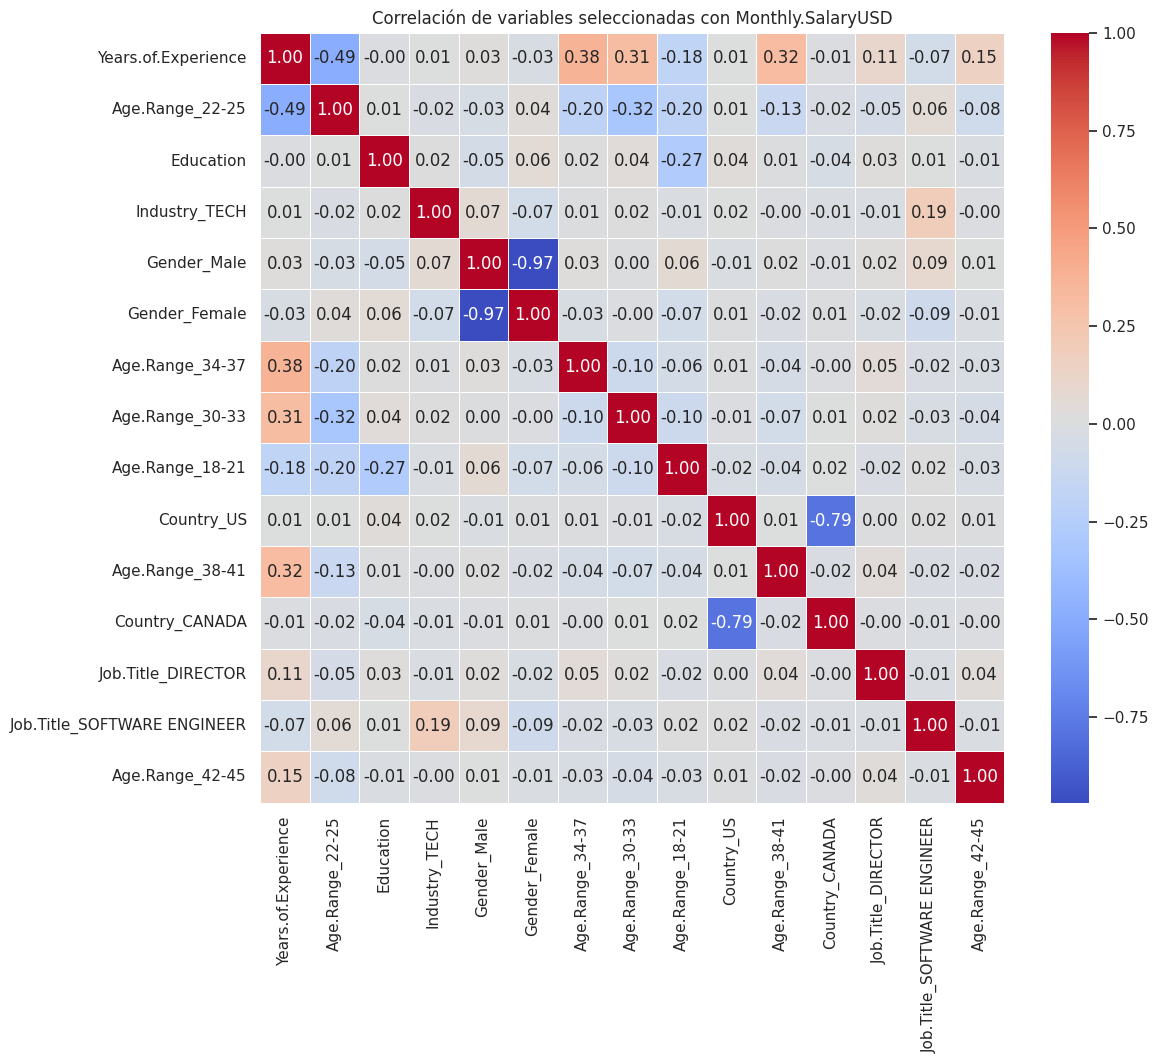

In [36]:
# Calcular la correlación con la variable objetivo
correlation_with_target = salaries_encoded.drop('Monthly.SalaryUSD', axis=1).corrwith(salaries['Monthly.SalaryUSD'])

# Seleccionar las variables con mayor correlación
top_features = correlation_with_target.abs().nlargest(15).index

# Crear el mapa de calor para las variables seleccionadas
selected_variables = salaries_encoded[top_features]
correlation_matrix = selected_variables.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlación de variables seleccionadas con Monthly.SalaryUSD')
plt.show()


Según los resultados obtenidos en el análisis de correlación, las características más relevantes para predecir el salario mensual (Monthly.SalaryUSD) son:

1. Years.of.Experience: La experiencia laboral tiene una correlación positiva de 0.302236 con el salario mensual. Esto indica que a medida que aumenta la experiencia, es probable que el salario también aumente.

2. Age.Range_22-25: El rango de edad entre 22 y 25 años tiene una correlación positiva de 0.225318 con el salario mensual. Esto sugiere que las personas en ese rango de edad tienden a tener salarios más altos.

3. Education: La educación tiene una correlación positiva de 0.210652 con el salario mensual. Esto implica que un nivel educativo más alto puede estar asociado a salarios más altos.

4. Industry_TECH: La industria "TECH" tiene una correlación positiva de 0.191367 con el salario mensual. Esto sugiere que trabajar en la industria tecnológica puede estar relacionado con salarios más altos.

Basándonos en estos hallazgos, se puede justificar la elección de los siguientes modelos de Machine Learning para predecir el salario mensual:
1. Random Forest
2. Gradient Boosting
3. XGBoost

La elección de estos tres modelos se basa en su capacidad para tratar las características relevantes identificadas y su capacidad para generar predicciones precisas en problemas de regresión.

### 3.2. Random Forest




Los modelos de Random Forest son conocidos por su capacidad para manejar características numéricas y categóricas, como las que tenemos en nuestro conjunto de datos después de aplicar One Hot Encoding y Ordinal Encoding. También son robustos frente a datos ruidosos y tienen un buen rendimiento en problemas de regresión.


In [37]:
# Crear y Entrenar el modelo de Random Forest
model_random = RandomForestRegressor()
model_random.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model_random.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE): ", mse)
print("Raíz del error cuadrático medio (RMSE): ", rmse)
print("Error absoluto medio (MAE): ", mae)
print("Coeficiente de determinación (R2): ", r2)

Error cuadrático medio (MSE):  9900517.519399578
Raíz del error cuadrático medio (RMSE):  3146.5087826668428
Error absoluto medio (MAE):  2026.0733858738859
Coeficiente de determinación (R2):  0.27649299682357376


### 3.3. Gradient Boosting


Los modelos de Gradient Boosting, como el Gradient Boosting Regressor, son poderosos en problemas de regresión y pueden manejar características numéricas y categóricas. Estos modelos tienen una alta capacidad de generalización y pueden capturar relaciones no lineales entre las características y el objetivo.

In [38]:
# Crear y entrenar el modelo de Gradient Boosting
model_gradient = GradientBoostingRegressor()
model_gradient.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model_gradient.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE): ", mse)
print("Raíz del error cuadrático medio (RMSE): ", rmse)
print("Error absoluto medio (MAE): ", mae)
print("Coeficiente de determinación (R2): ", r2)


Error cuadrático medio (MSE):  9154951.465771766
Raíz del error cuadrático medio (RMSE):  3025.7150338013935
Error absoluto medio (MAE):  1984.5498831704476
Coeficiente de determinación (R2):  0.33097724576039567


### 3.4. XGBoost

XGBoost es una implementación mejorada del Gradient Boosting y ha demostrado ser eficiente y efectiva en una amplia gama de problemas de regresión. XGBoost tiene una capacidad inherente para manejar características mixtas y puede proporcionar predicciones precisas.

In [39]:
# Crear y Entrenar el modelo de XGBoost
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model_xgb.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE): ", mse)
print("Raíz del error cuadrático medio (RMSE): ", rmse)
print("Error absoluto medio (MAE): ", mae)
print("Coeficiente de determinación (R2): ", r2)

Error cuadrático medio (MSE):  8666864.306996834
Raíz del error cuadrático medio (RMSE):  2943.953856125607
Error absoluto medio (MAE):  1900.1216204422815
Coeficiente de determinación (R2):  0.36664553045785697


### 3.5. Selección de un Modelo

Después de evaluar los modelos de Random Forest, Gradient Boosting y XGBoost para predecir el salario mensual (Monthly.SalaryUSD), se seleccionó el modelo XGBoost debido a su mejor rendimiento en términos de métricas de evaluación como MSE, RMSE, MAE y R2. Si bien se reconoce que los resultados obtenidos no son los ideales, se es consciente de que se requerirán iteraciones y mejoras adicionales en el modelo en etapas posteriores. Esto incluirá la optimización de hiperparámetros, la consideración de nuevas características relevantes y otras técnicas para mejorar la precisión de las predicciones.

Las razones de porqué se eligió XGBoost son:

1. Error cuadrático medio (MSE) y Raíz del error cuadrático medio (RMSE): El modelo XGBoost tiene un MSE y RMSE más bajos en comparación con los otros dos modelos. Esto significa que el modelo XGBoost tiene una mejor capacidad para reducir el error en las predicciones del salario mensual. Un menor MSE y RMSE indican una mejor precisión en las predicciones.

2. Error absoluto medio (MAE): El modelo XGBoost también tiene un MAE más bajo en comparación con los otros dos modelos. Esto indica que el modelo XGBoost tiene una menor diferencia promedio entre las predicciones y los valores reales del salario mensual. Un MAE más bajo sugiere una mejor capacidad para hacer predicciones más cercanas a los valores reales.

3. Coeficiente de determinación (R2): El modelo XGBoost tiene el coeficiente de determinación (R2) más alto entre los tres modelos. El R2 mide la proporción de la varianza en el objetivo que se puede explicar por las características del modelo. Un valor de R2 más alto indica una mejor capacidad del modelo para capturar la variabilidad en los datos y hacer predicciones más precisas.


### 3.6. Análisis Gráfico del Modelo Elegido

In [40]:
# Obtener la cantidad de árboles generados en XGBoost
num_trees = model_xgb.best_iteration
# Otra opción: num_trees = model.best_iteration_

print("Número de árboles generados:", num_trees)

Número de árboles generados: 99


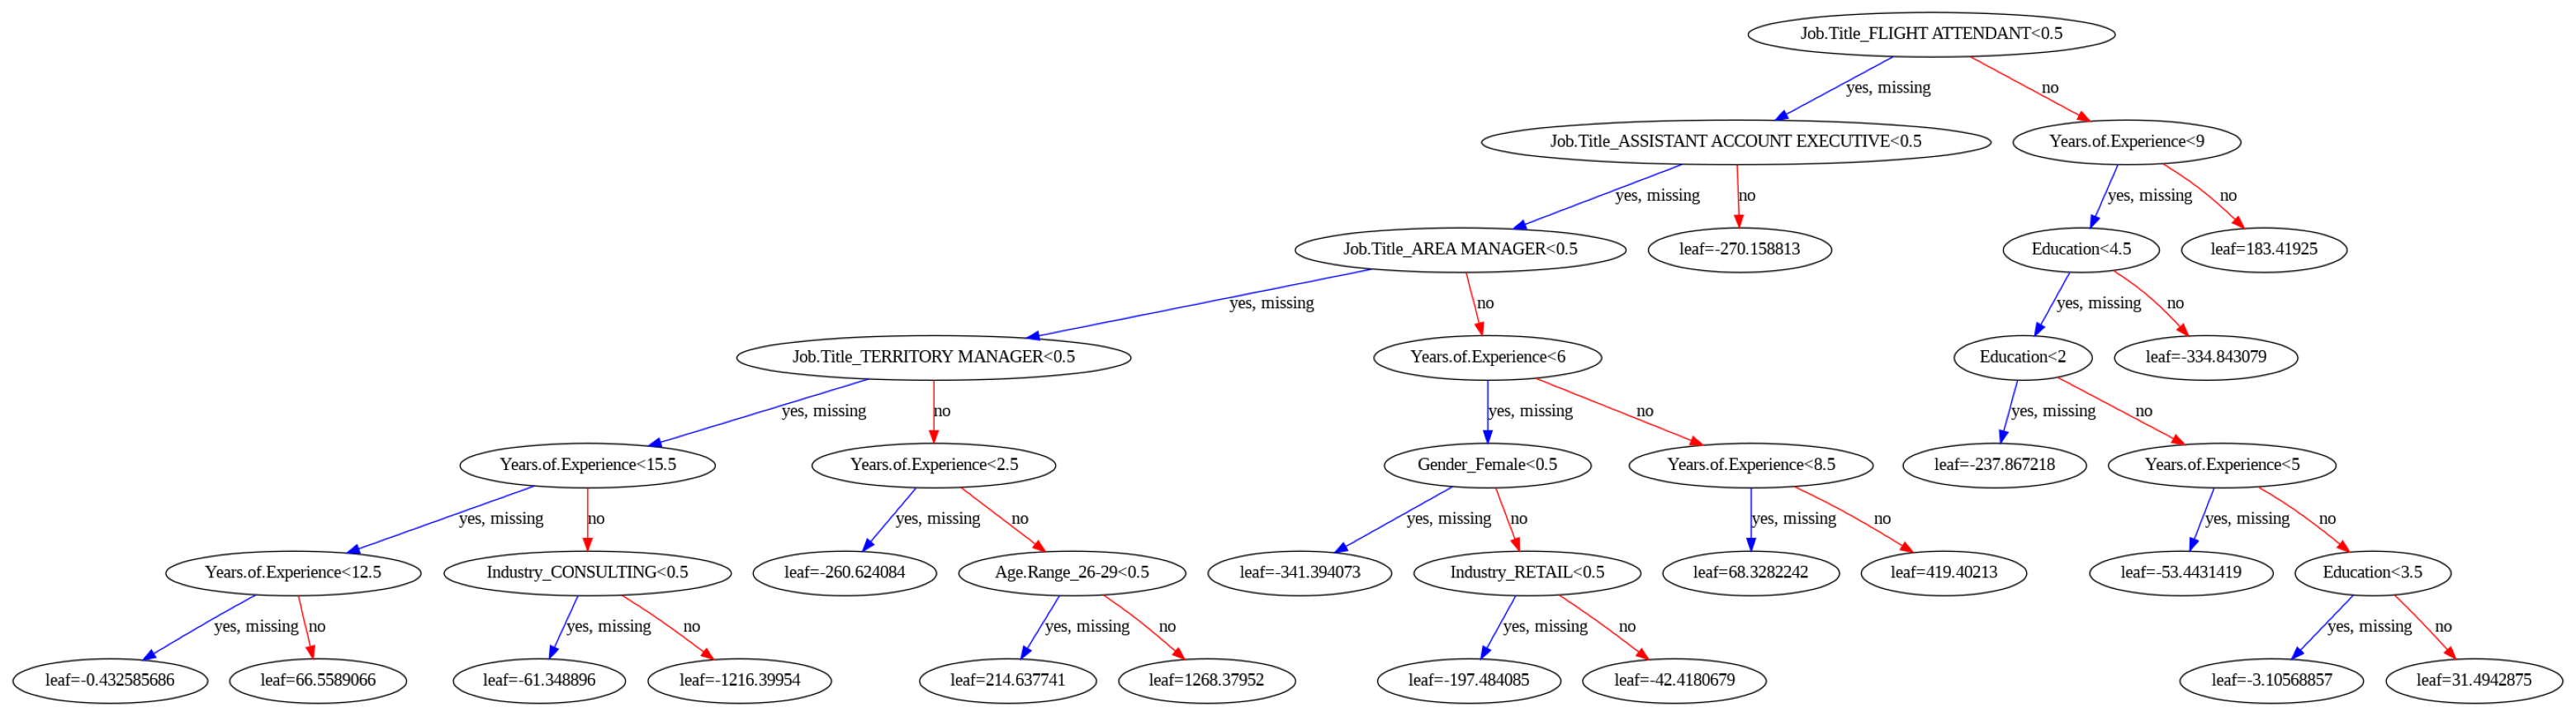

In [41]:
# Obtener el primer árbol del modelo
tree = model_xgb.get_booster().get_dump()[0]

# Graficar el ultimo árbol de decisión
fig, ax = plt.subplots(figsize=(40,35))
xgb.plot_tree(model_xgb, num_trees=99, ax=ax)
plt.show()


In [42]:
# Obtener las predicciones en el conjunto de prueba
y_pred = model_xgb.predict(X_test)

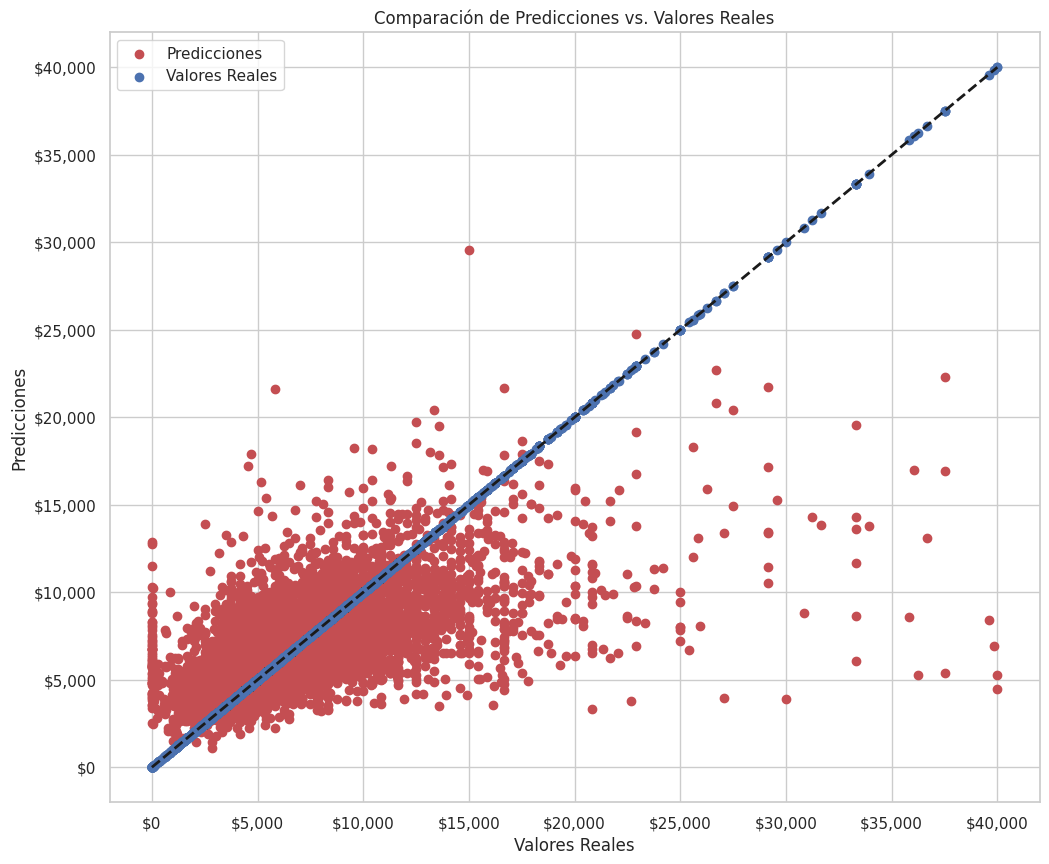

In [43]:
# Crear un gráfico de dispersión de predicciones vs. valores reales
plt.figure(figsize=(12, 10))
plt.scatter(y_test, y_pred, color='r', label='Predicciones')
plt.scatter(y_test, y_test, color='b', label='Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Establecer formato de los valores en el eje y
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Establecer formato de los valores en el eje x
plt.gca().get_xaxis().set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))


plt.title('Comparación de Predicciones vs. Valores Reales')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Curva de Aprendizaje')

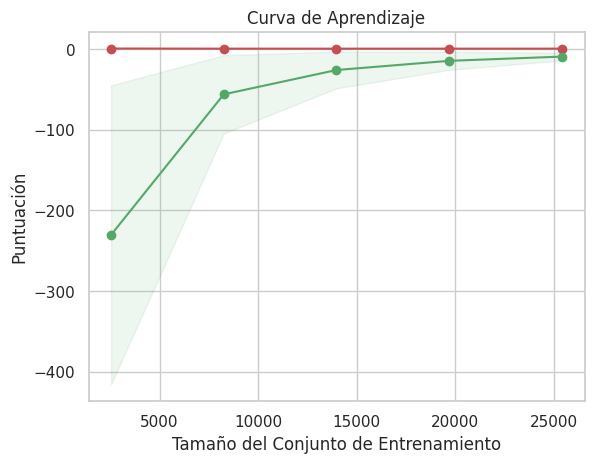

In [44]:
# Obtener la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model_xgb, X, y, cv=5)

# Calcular las medias y desviaciones estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Crear un gráfico de curva de aprendizaje
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Puntuación de Entrenamiento')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Puntuación de Validación Cruzada')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Puntuación')
plt.title('Curva de Aprendizaje')

### 3.7. Entrenamientos post entrega

#### 3.7.1. Modelo Combinado

In [45]:
# Obtener las predicciones de los modelos individuales
predictions_rf = model_random.predict(X_test)
predictions_gb = model_gradient.predict(X_test)
predictions_xgb = model_xgb.predict(X_test)

# Calcular las predicciones promediadas
predictions_combined = (predictions_rf + predictions_gb + predictions_xgb) / 3

# Evaluar el rendimiento del modelo combinado
mse_combined = mean_squared_error(y_test, predictions_combined)
rmse_combined = np.sqrt(mse_combined)
mae_combined = mean_absolute_error(y_test, predictions_combined)
r2_combined = r2_score(y_test, predictions_combined)

# Imprimir las métricas de evaluación del modelo combinado
print("Error cuadrático medio (MSE) del modelo combinado:", mse_combined)
print("Raíz del error cuadrático medio (RMSE) del modelo combinado:", rmse_combined)
print("Error absoluto medio (MAE) del modelo combinado:", mae_combined)
print("Coeficiente de determinación (R2) del modelo combinado:", r2_combined)

Error cuadrático medio (MSE) del modelo combinado: 8717943.878344323
Raíz del error cuadrático medio (RMSE) del modelo combinado: 2952.6164461955304
Error absoluto medio (MAE) del modelo combinado: 1911.6470641836377
Coeficiente de determinación (R2) del modelo combinado: 0.36291275310387083


#### 3.7.2. Ensamblaje por Votación Ponderada:

In [46]:
# Calcular las predicciones ponderadas
predictions_combined = (0.1 * predictions_rf) + (0.1 * predictions_gb) + (0.8 * predictions_xgb)

# Evaluar el rendimiento del modelo combinado
mse_combined = mean_squared_error(y_test, predictions_combined)
rmse_combined = np.sqrt(mse_combined)
mae_combined = mean_absolute_error(y_test, predictions_combined)
r2_combined = r2_score(y_test, predictions_combined)

# Imprimir las métricas de evaluación del modelo combinado
print("Error cuadrático medio (MSE) del modelo combinado:", mse_combined)
print("Raíz del error cuadrático medio (RMSE) del modelo combinado:", rmse_combined)
print("Error absoluto medio (MAE) del modelo combinado:", mae_combined)
print("Coeficiente de determinación (R2) del modelo combinado:", r2_combined)

Error cuadrático medio (MSE) del modelo combinado: 8619575.862761986
Raíz del error cuadrático medio (RMSE) del modelo combinado: 2935.911419433833
Error absoluto medio (MAE) del modelo combinado: 1895.926471770351
Coeficiente de determinación (R2) del modelo combinado: 0.37010126097963947


#### 3.7.3. Apilamiento (Stacking):

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Obtener las predicciones de los modelos base utilizando validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

meta_features = []
meta_labels = []

X_train = X_train.values
y_train = y_train.values

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model_random.fit(X_train_fold, y_train_fold)
    model_gradient.fit(X_train_fold, y_train_fold)
    model_xgb.fit(X_train_fold, y_train_fold)

    predictions_rf = model_random.predict(X_val_fold)
    predictions_gb = model_gradient.predict(X_val_fold)
    predictions_xgb = model_xgb.predict(X_val_fold)

    meta_features.append(np.column_stack((predictions_rf, predictions_gb, predictions_xgb)))
    meta_labels.append(y_val_fold)

meta_features = np.concatenate(meta_features, axis=0)
meta_labels = np.concatenate(meta_labels, axis=0)

# Entrenar el modelo meta utilizando las predicciones de los modelos base
meta_model = LinearRegression()
meta_model.fit(meta_features, meta_labels)

# Obtener las predicciones de los modelos base en el conjunto de prueba
predictions_rf_test = model_random.predict(X_test)
predictions_gb_test = model_gradient.predict(X_test)
predictions_xgb_test = model_xgb.predict(X_test)

# Obtener las predicciones del modelo meta utilizando las predicciones de los modelos base en el conjunto de prueba
meta_features_test = np.column_stack((predictions_rf_test, predictions_gb_test, predictions_xgb_test))
predictions_combined = meta_model.predict(meta_features_test)

# Evaluar el rendimiento del modelo combinado
mse_combined = mean_squared_error(y_test, predictions_combined)
rmse_combined = np.sqrt(mse_combined)
mae_combined = mean_absolute_error(y_test, predictions_combined)
r2_combined = r2_score(y_test, predictions_combined)

# Imprimir las métricas de evaluación del modelo combinado
print("Error cuadrático medio (MSE) del modelo combinado:", mse_combined)
print("Raíz del error cuadrático medio (RMSE) del modelo combinado:", rmse_combined)
print("Error absoluto medio (MAE) del modelo combinado:", mae_combined)
print("Coeficiente de determinación (R2) del modelo combinado:", r2_combined)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Error cuadrático medio (MSE) del modelo combinado: 8643139.768865142
Raíz del error cuadrático medio (RMSE) del modelo combinado: 2939.9217283569205
Error absoluto medio (MAE) del modelo combinado: 1899.0426602270495
Coeficiente de determinación (R2) del modelo combinado: 0.36837926502797125


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [48]:
X = salaries_encoded.drop(columns=['Monthly.SalaryUSD'])
y = salaries_encoded['Monthly.SalaryUSD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 3.7.4. Grid Search + Random Forest:

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Crear el modelo de Random Forest
rf = RandomForestRegressor()

# Realizar Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Entrenar el mejor modelo con los datos de entrenamiento completos
best_model.fit(X_train, y_train)

# Realizar predicciones con el mejor modelo
predictions = best_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Error cuadrático medio (MSE): ", mse)
print("Raíz del error cuadrático medio (RMSE): ", rmse)
print("Error absoluto medio (MAE): ", mae)
print("Coeficiente de determinación (R2): ", r2)


Error cuadrático medio (MSE):  9347996.142647885
Raíz del error cuadrático medio (RMSE):  3057.4492870116233
Error absoluto medio (MAE):  1970.9150976704348
Coeficiente de determinación (R2):  0.3168699856730186


#### 3.7.5. Random Search + Random Forest:

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Definir los rangos de valores para los hiperparámetros
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': np.arange(2, 11)
}

# Crear el modelo de Random Forest
rf = RandomForestRegressor()

# Realizar Random Search
random_search = RandomizedSearchCV(rf, param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Entrenar el mejor modelo con los datos de entrenamiento completos
best_model.fit(X_train, y_train)

# Realizar predicciones con el mejor modelo
predictions = best_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Error cuadrático medio (MSE): ", mse)
print("Raíz del error cuadrático medio (RMSE): ", rmse)
print("Error absoluto medio (MAE): ", mae)
print("Coeficiente de determinación (R2): ", r2)

Error cuadrático medio (MSE):  9221414.660138536
Raíz del error cuadrático medio (RMSE):  3036.678227955431
Error absoluto medio (MAE):  1971.8322672127085
Coeficiente de determinación (R2):  0.32612026868989297


#### 3.7.6. Grid Search + XGBoost:

In [51]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Crear el modelo de XGBoost
xgb = XGBRegressor()

# Realizar Grid Search
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Entrenar el mejor modelo con los datos de entrenamiento completos
best_model.fit(X_train, y_train)

# Realizar predicciones con el mejor modelo
predictions = best_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Error cuadrático medio (MSE): ", mse)
print("Raíz del error cuadrático medio (RMSE): ", rmse)
print("Error absoluto medio (MAE): ", mae)
print("Coeficiente de determinación (R2): ", r2)


Error cuadrático medio (MSE):  8661876.057110988
Raíz del error cuadrático medio (RMSE):  2943.106531729864
Error absoluto medio (MAE):  1901.6053062915998
Coeficiente de determinación (R2):  0.3670100602633881
